<a href="https://colab.research.google.com/github/geovalexis/ml-in-args/blob/master/ml/ML_for_AMR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data

In [34]:
args_df = pd.read_csv("/content/drive/MyDrive/TFM/data/args_data_cleaned.tsv", sep="\t", header=0)
args_df

,sample_name,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,...,ere(A),erm(42),fosA3,mph(E),msr(E),qnrA1,qnrB2,qnrB77,qnrS2,tet(D)
0,GCA_012637185.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_012637285.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_012637315.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_012637385.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_012637425.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,GCA_008519545.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6204,GCA_008476005.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6205,GCF_001480865.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,GCA_007474515.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
snps_df = pd.read_csv("/content/drive/MyDrive/TFM/data/card_snps_data_cleaned.tsv", sep="\t", header=0)
snps_df

,SAMPLE_ID,S357N,D350N,E350Q,E448K,R234F,T86I,D87N,S80I,S83F,T18P,D87Y,D87G,S464Y,G103S,Y137H,S83L
0,GCA_003869435.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,GCA_003870275.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,GCA_003870555.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0
3,GCA_003872315.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,GCA_003872455.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,GCF_001481335.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2773,GCF_001952125.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2774,GCF_001952325.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0
2775,GCF_001952475.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
amr_labels_df = pd.read_csv("/content/drive/MyDrive/TFM/data/amr_labels_cleaned.tsv", sep="\t", header=0)
amr_labels_df

,SampleID,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,GCA_007192475.1,1.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_007191145.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_007188155.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_007190575.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0
4,GCA_007194615.1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,GCA_006500015.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6203,GCA_006497875.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,1.0
6204,GCA_006497955.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6205,GCA_006815005.1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,1.0,1.0,0.0


# Preprocess data

For some reason, the sample `GCF_001242765.1` does not have AMR label information:

In [7]:
args_df = args_df[args_df["sample_name"] != "GCF_001242765.1"]

In [8]:
snps_df = snps_df[snps_df["SAMPLE_ID"] != "GCF_001242765.1"]

In [9]:
#TODO: preprend a prefix to all the columns in order to identify the type of data afterhand: "gene/"  and "snp/"

Let's how much imbalance do we have:



In [10]:
amr_labels_df.drop("SampleID", axis=1).apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,4689,3790,4773,4087,4683,5238,6022,5576,5931,3623,3557,2863,5365
1.0,753,1652,669,707,759,204,185,630,275,1818,1539,3343,76


# Try differente ML approaches

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Approach 1: both ARGs and SNPs

In [12]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3770,2973,3840,3781,3769,4292,4441,3887,4381,2856,3016,1979,4396
1.0,678,1475,608,667,679,156,7,561,67,1592,1432,2469,52


In [13]:
X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(-1).drop("SAMPLE_ID", axis=1).set_index("sample_name") #TODO: double check that most of the SNPs have a correct value (!= -1) when all data is loaded
X

,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,ant(2'')-Ia,...,D87N,S80I,S83F,T18P,D87Y,D87G,S464Y,G103S,Y137H,S83L
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_003869435.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003870275.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003870555.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003872315.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003872455.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001242565.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_007189195.1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_008426085.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8696629213483146


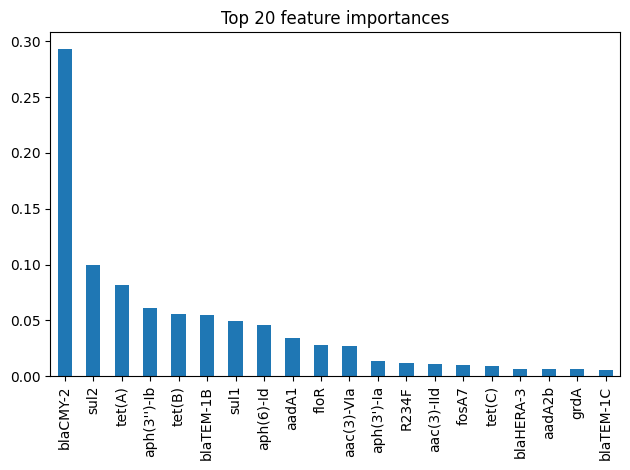

In [17]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

In [18]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.09550561797752809

## Approach 2: only ARGs data

In [19]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3770,2973,3840,3781,3769,4292,4441,3887,4381,2856,3016,1979,4396
1.0,678,1475,608,667,679,156,7,561,67,1592,1432,2469,52


In [20]:
X = pd.merge(y.reset_index()[["sample_name"]], args_df, how="left", on="sample_name")
X = X.fillna(-1).set_index("sample_name")
X

,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,ant(2'')-Ia,...,ere(A),erm(42),fosA3,mph(E),msr(E),qnrA1,qnrB2,qnrB77,qnrS2,tet(D)
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_003869435.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003870275.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003870555.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003872315.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003872455.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001242565.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_007189195.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_008426085.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8426966292134831


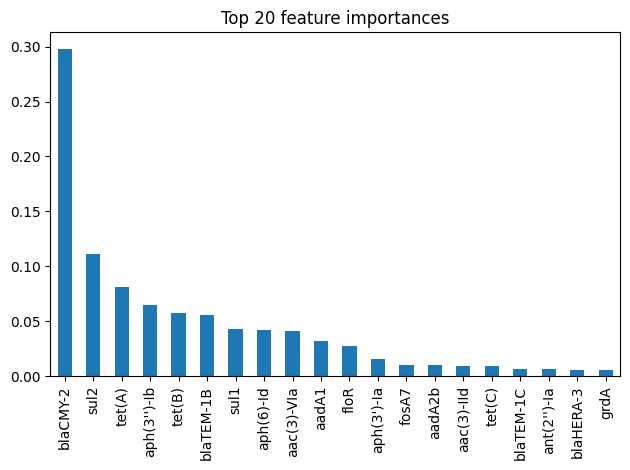

In [22]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

In [23]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.07865168539325842

## Approach 3: only SNPs data

In [29]:
y = pd.merge(snps_df["SAMPLE_ID"], amr_labels_df, left_on="SAMPLE_ID", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("SAMPLE_ID")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,1855,1443,1877,1858,1853,2073,2157,1878,2121,1380,1450,928,2135
1.0,308,720,286,305,310,90,6,285,42,783,713,1235,28


In [30]:
X = pd.merge(y.reset_index()[["SAMPLE_ID"]], snps_df, how="left", on="SAMPLE_ID") # We do this in order to avoid null antibiotics labels
X = X.fillna(-1).set_index("SAMPLE_ID")
X

,S357N,D350N,E350Q,E448K,R234F,T86I,D87N,S80I,S83F,T18P,D87Y,D87G,S464Y,G103S,Y137H,S83L
SAMPLE_ID,,,,,,,,,,,,,,,,
GCA_003869435.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003870275.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003870555.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0
GCA_003872315.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003872455.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001481335.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
GCF_001952125.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
GCF_001952325.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.22863741339491916


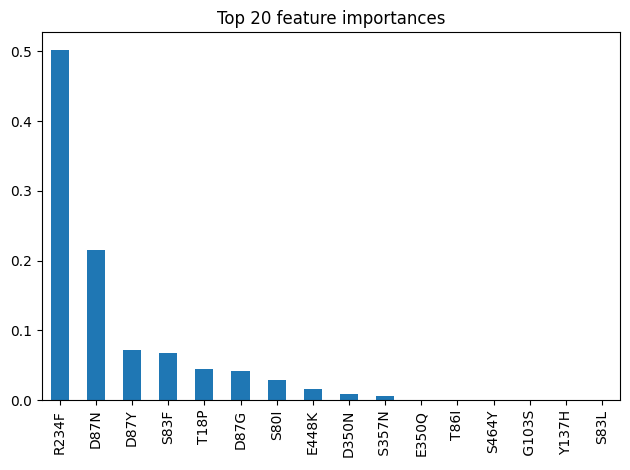

In [32]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

In [33]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.10161662817551963

## Conclusion

After trying different approaches, we have noticed that the best performing data correspond to mix between ARGs and SNPs. Although SNPs data is not really providing too much information, it indeed increases the overall accuracy when train with ARGs data

# Model tunning

In [38]:
# Prepare data
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()

X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(-1).drop("SAMPLE_ID", axis=1).set_index("sample_name") #TODO: double check that most of the SNPs have a correct value (!= -1) when all data is loaded

## Random Forest


In [35]:
#TODO

## CNN

In [36]:
#TODO

# Model evaluation

In [ ]:
#TODO